In [86]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 5.9 MB/s eta 0:00:07
    --------------------------------------- 0.5/38.6 MB 5.1 MB/s eta 0:00:08
    --------------------------------------- 0.8/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.6 MB 5.6 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.6 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.6/38.6 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.6 MB 5.6 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.6 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.1/38.6 MB 4.9 MB/s eta 0:00:08
   -- ----------

# Part 4: Image Classification using Transfer Learning
Objective: The objective of this assignment is to develop an image classification model using transfer learning. You will find a pretrain a neural network model, and then use transfer learning to classify logos of popular food chains. 


In [3]:
#importing all required libraies.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

import torch
import tensorflow as tf
import cv2
import glob 
from keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

1.	Download the dataset and read: 

In [4]:
path = r"C:\Users\Admin\Downloads\Logos\logos_v3_mini\logos3"
print(os.listdir(path))

['test', 'train']


In [5]:
train = path+'/train'
test = path+'/test'
print(os.listdir(test))

['Burger King', 'KFC', 'McDonalds', 'Other', 'Starbucks', 'Subway']


In [6]:
classes = ['Burger King', 'KFC', 'McDonalds', 'Other', 'Starbucks', 'Subway']

# 2.	Preprocess the data by resizing the images and splitting them into training (80%) and validation sets (20%).

In [7]:
test_split = ImageDataGenerator().flow_from_directory(
    test, 
    target_size=(224,224), 
    classes=classes,
    shuffle= False,
    batch_size = 32)


Found 560 images belonging to 6 classes.


In [23]:

img_height = 224
img_width = 224
batch_size =32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Define ImageDataGenerator for testing set (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and split training data
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load and split validation data
validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1393 images belonging to 6 classes.
Found 345 images belonging to 6 classes.
Found 560 images belonging to 6 classes.


In [24]:
train_generator.class_indices

{'Burger King': 0,
 'KFC': 1,
 'McDonalds': 2,
 'Other': 3,
 'Starbucks': 4,
 'Subway': 5}

In train Split 
Burger King : 238
KFC : 56
McDonalds : 152
Other : 660
Starbucks : 187
Subway : 100



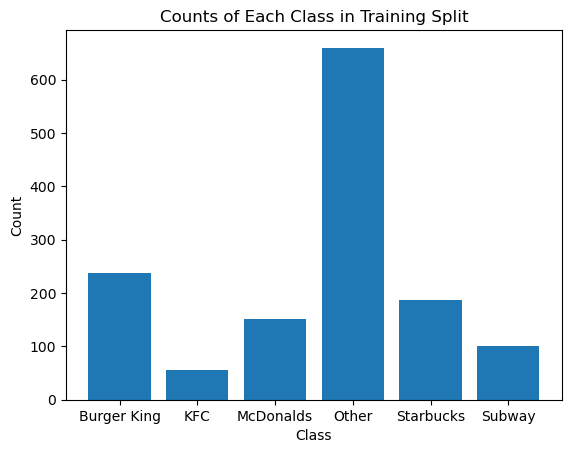

In [25]:
print ("In train Split ")
for i in range(len (train_generator.class_indices)):
    print(classes[i],":",list(train_generator.classes).count(i))
print ("") 

counts = [list(train_generator.classes).count(i) for i in range(len(classes))]
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Each Class in Training Split')
plt.show()

In validation Split 
Burger King : 59
KFC : 14
McDonalds : 37
Other : 165
Starbucks : 46
Subway : 24



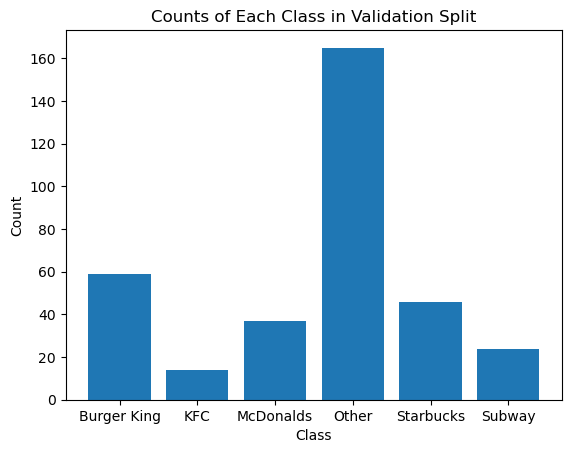

In [26]:
print ("In validation Split ")
for i in range(len (validation_generator.class_indices)):
    print(classes[i],":",list(validation_generator.classes).count(i))
print ("") 

counts = [list(validation_generator.classes).count(i) for i in range(len(classes))]
plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Each Class in Validation Split')
plt.show()

Found 1393 images belonging to 6 classes.


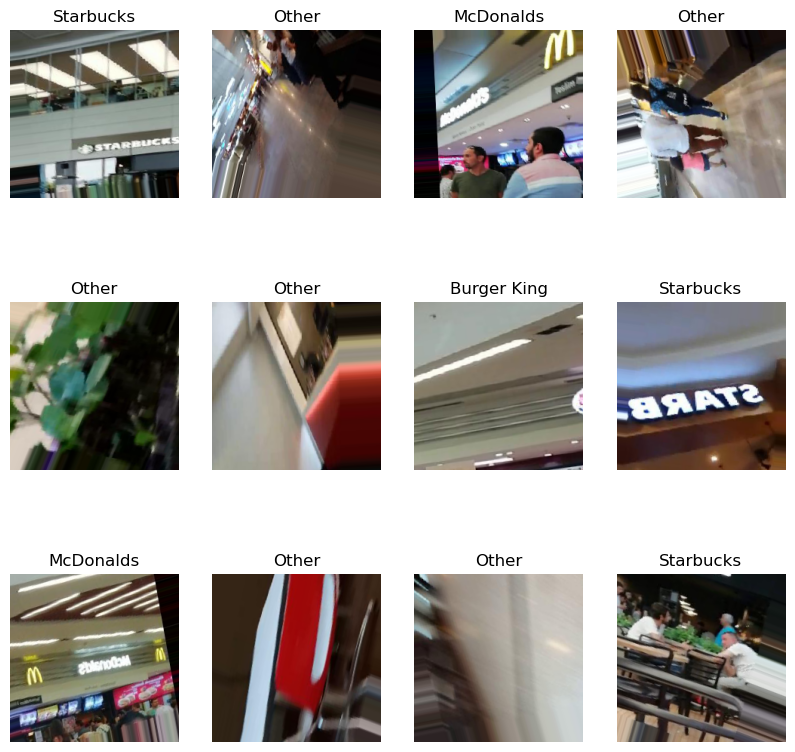

In [34]:
trains = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),  # Make sure img_height and img_width are defined properly
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)


class_names = list(trains.class_indices.keys())

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(min(12, images.shape[0])):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])  # Convert label to int and get corresponding class name
    plt.axis("off")
plt.show()

In [33]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [16]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1738 images belonging to 6 classes.
Found 1738 images belonging to 6 classes.


# 3.	Load a pre-trained model, such as VGG-16 or ResNet, using Keras or PyTorch. (or a library of your choice)

In [14]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False
num_classes=6
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model using data generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 1119s 21s/step - accuracy: 0.6639 - loss: 1.8679 - val_accuracy: 0.8889 - val_loss: 0.3318
Epoch 2/10
 1/54 ━━━━━━━━━━━━━━━━━━━━ 9:58 11s/step - accuracy: 0.7812 - loss: 0.5232

C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.7812 - loss: 0.5232 - val_accuracy: 0.8000 - val_loss: 0.4559
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1184s 22s/step - accuracy: 0.8803 - loss: 0.3411 - val_accuracy: 0.9352 - val_loss: 0.1955
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.9062 - loss: 0.1234 - val_accuracy: 0.9000 - val_loss: 0.5207
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7052s 133s/step - accuracy: 0.9130 - loss: 0.2583 - val_accuracy: 0.9439 - val_loss: 0.1791
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9375 - loss: 0.1827 - val_accuracy: 0.9000 - val_loss: 0.3177
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1200s 22s/step - accuracy: 0.9222 - loss: 0.2150 - val_accuracy: 0.9468 - val_loss: 0.1605
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.9688 - loss: 0.1010 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1208s 22s/step - accuracy: 0.9416 - loss: 0.1792 - val_accuracy: 0.9479 -

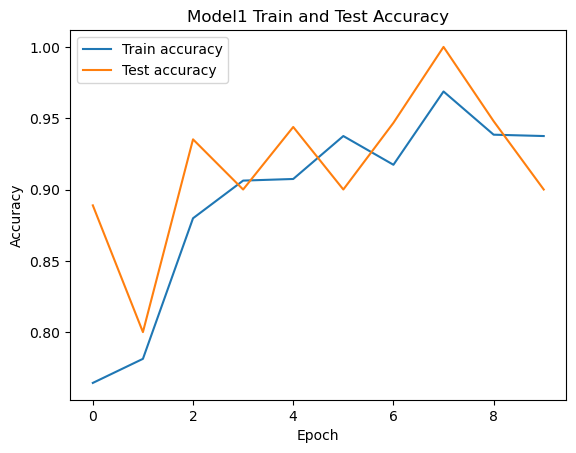

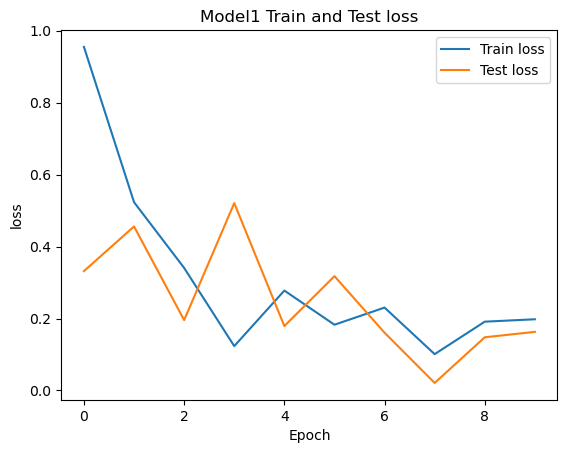

In [16]:
model1_train_acc = history.history['accuracy'][-1]
model1_test_acc = history.history['val_accuracy'][-1]
model1_train_acc = history.history['accuracy'][-1]
model1_test_acc = history.history['val_accuracy'][-1]

#plotting test vs train accuracies and losses 
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model1 Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model1 Train and Test loss')
plt.legend()
plt.show()

In [21]:
train_generator.class_indices

{'Burger King': 0,
 'KFC': 1,
 'McDonalds': 2,
 'Other': 3,
 'Starbucks': 4,
 'Subway': 5}

In [48]:
#Saved the model to save for future runs
#Please find it in the lower cells


In [49]:
from keras.models import model_from_json

json_file = 'modelVGG16.json'

# Load the model architecture from the JSON file
with open(json_file, 'r') as f:
    loaded_model_json = f.read()

# Reconstruct the model from the JSON
model1 = model_from_json(loaded_model_json)

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load the weights if they are saved separately
model1.load_weights('modelvgg16.weights.h5')

In [50]:
from keras.preprocessing import image
img_path = "C:\\Users\\Admin\\Downloads\\Logos\\logos_v3_mini\\logos3\\train\\Subway\\ankamall_image_664.jpg"  # Specify the path to your image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values to [0, 1]

# Make predictions
predictions = model1.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


5


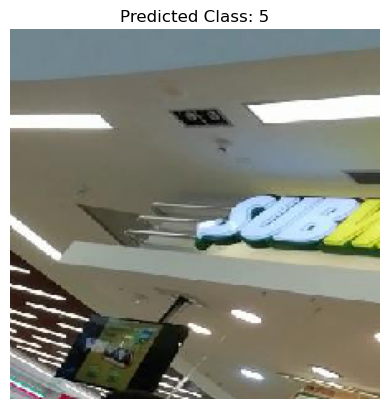

In [51]:
print(predicted_class)

plt.imshow(img)
plt.axis('off')
plt.title("Predicted Class: {}".format(predicted_class))
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
2


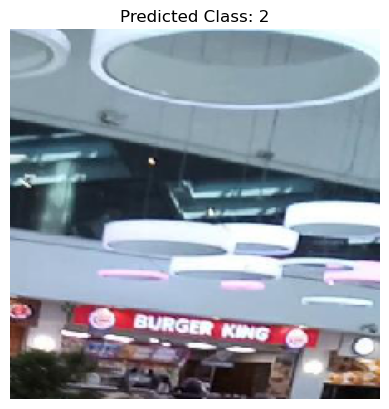

In [52]:
img_path =  "C:\\Users\\Admin\\Downloads\\Logos\\logos_v3_mini\\logos3\\test\\Burger King\\armada_image_94.jpg" # Specify the path to your image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values to [0, 1]

# Make predictions
predictions = model1.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)

print(predicted_class)

plt.imshow(img)
plt.axis('off')
plt.title("Predicted Class: {}".format(predicted_class))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
5


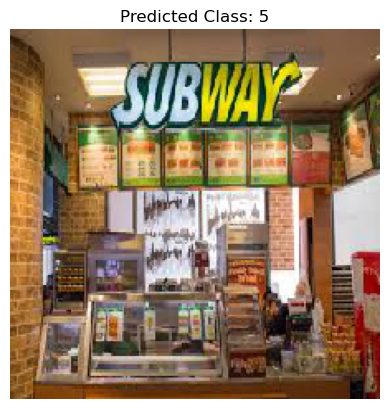

In [48]:
img_path =  "C:\\Users\\Admin\\Downloads\\download.jpg" #Unseen data
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values "to [0, 1]

# Make predictions
predictions = model_inception.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)

print(predicted_class)

plt.imshow(img)
plt.axis('off')
plt.title("Predicted Class: {}".format(predicted_class))
plt.show()

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)  # You can also include other preprocessing steps here if needed
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)

Found 560 images belonging to 6 classes.
18/18 ━━━━━━━━━━━━━━━━━━━━ 208s 12s/step - accuracy: 0.6914 - loss: 1.0830


In [28]:
test_accuracy

0.6857143044471741

In [29]:
test_loss

1.0694128274917603

In [34]:
modelvgg16 = model.to_json()
with open('modelvgg16.json','w') as json_file:
    json_file.write(modelvgg16)
model.save_weights('modelvgg16.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1


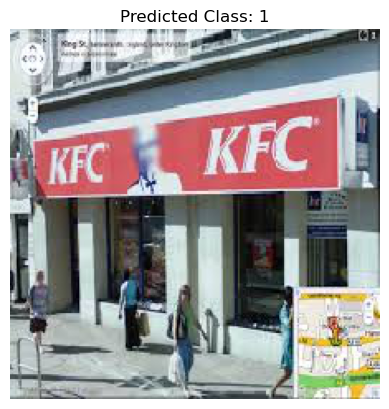

In [44]:
img_path =  "C:\\Users\\Admin\\Downloads\\images (1).jpg" #Unseen data
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values "to [0, 1]

# Make predictions
predictions = model_inception.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)

print(predicted_class)

plt.imshow(img)
plt.axis('off')
plt.title("Predicted Class: {}".format(predicted_class))
plt.show()

# 5.	Freeze the weights of the pre-trained layers and train only the new fully connected layer using the training set.



In [38]:
from keras.applications import ResNet50

# Load pre-trained ResNet50 model without top layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model_resnet.layers:
    layer.trainable = False

# Add custom classification layers
x_resnet = Flatten()(base_model_resnet.output)
x_resnet = Dense(256, activation='relu')(x_resnet)
predictions_resnet = Dense(num_classes, activation='softmax')(x_resnet)

# Create the final ResNet model
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Compile the ResNet model
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the ResNet model using data generators
history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 435s 8s/step - accuracy: 0.4929 - loss: 8.2216 - val_accuracy: 0.6690 - val_loss: 1.7217
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8125 - loss: 0.8846 - val_accuracy: 0.6000 - val_loss: 2.6116
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 421s 8s/step - accuracy: 0.6333 - loss: 2.0348 - val_accuracy: 0.7390 - val_loss: 0.9397
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7812 - loss: 0.7353 - val_accuracy: 0.8000 - val_loss: 0.6703
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 420s 8s/step - accuracy: 0.6673 - loss: 1.5266 - val_accuracy: 0.5122 - val_loss: 1.7566
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6250 - loss: 1.1021 - val_accuracy: 0.3000 - val_loss: 2.4128
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 386s 7s/step - accuracy: 0.6312 - loss: 1.8337 - val_accuracy: 0.7286 - val_loss: 1.0677
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accura

# 6.	Evaluate the performance of the model using the validation set.

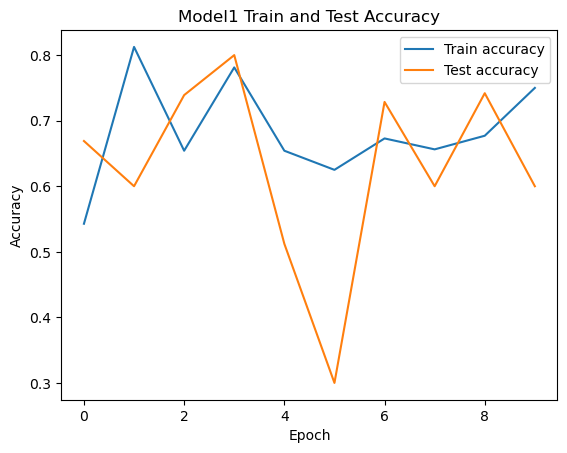

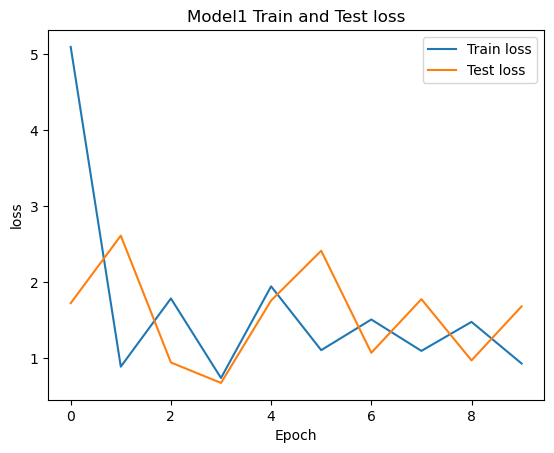

In [39]:
model2_train_acc = history_resnet.history['accuracy'][-1]
model2_test_acc = history_resnet.history['val_accuracy'][-1]
model2_train_acc = history_resnet.history['accuracy'][-1]
model2_test_acc = history_resnet.history['val_accuracy'][-1]

#plotting test vs train accuracies and losses 
plt.plot(history_resnet.history['accuracy'], label='Train accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model1 Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history_resnet.history['loss'], label='Train loss')
plt.plot(history_resnet.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model1 Train and Test loss')
plt.legend()
plt.show()

In [41]:
test_loss, test_accuracy = model_resnet.evaluate(test_generator)

18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.5242 - loss: 2.2959


In [79]:
modelresnet = model_resnet.to_json()
with open('modelresnet.json','w') as json_file:
    json_file.write(modelresnet)
model.save_weights('modelresnet.weights.h5')

In [42]:
from keras.applications import InceptionV3

# Load pre-trained InceptionV3 model without top layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model_inception.layers:
    layer.trainable = False

# Add custom classification layers
x_inception = Flatten()(base_model_inception.output)
x_inception = Dense(256, activation='relu')(x_inception)
predictions_inception = Dense(num_classes, activation='softmax')(x_inception)

# Create the final InceptionV3 model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Compile the InceptionV3 model
model_inception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the InceptionV3 model using data generators
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 285s 5s/step - accuracy: 0.5473 - loss: 18.3962 - val_accuracy: 0.7807 - val_loss: 1.2602
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8750 - loss: 0.8696 - val_accuracy: 0.8000 - val_loss: 0.6158
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.8580 - loss: 0.6046 - val_accuracy: 0.9190 - val_loss: 0.3035
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9688 - loss: 0.1707 - val_accuracy: 0.8000 - val_loss: 0.5060
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.8825 - loss: 0.4102 - val_accuracy: 0.9242 - val_loss: 0.2311
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9375 - loss: 0.3860 - val_accuracy: 0.9000 - val_loss: 0.5524
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.8986 - loss: 0.3402 - val_accuracy: 0.9201 - val_loss: 0.2720
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accur

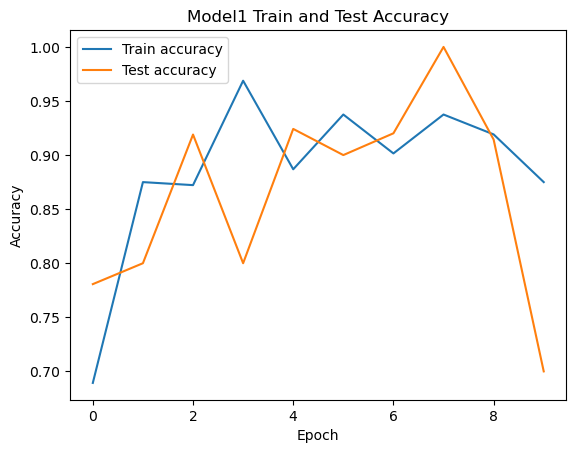

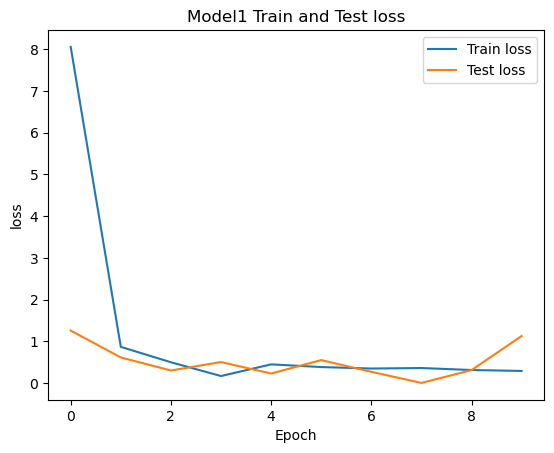

In [43]:
model3_train_acc = history_inception.history['accuracy'][-1]
model3_test_acc = history_inception.history['val_accuracy'][-1]
model3_train_acc = history_inception.history['accuracy'][-1]
model3_test_acc = history_inception.history['val_accuracy'][-1]

#plotting test vs train accuracies and losses 
plt.plot(history_inception.history['accuracy'], label='Train accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model1 Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(history_inception.history['loss'], label='Train loss')
plt.plot(history_inception.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model1 Train and Test loss')
plt.legend()
plt.show()

7.	Fine-tune the entire model by unfreezing some of the pre-trained layers and training them along with the new fully connected layer using the new dataset

In [64]:
from keras.applications import InceptionResNetV2

# Load the InceptionResNetV2 model with pre-trained weights
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Assuming num_classes is defined earlier

# Create the final model
modelInceptionResnet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modelInceptionResnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model using data generators
historyInceptionResnet = modelInceptionResnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 707s 13s/step - accuracy: 0.5503 - loss: 11.0906 - val_accuracy: 0.8565 - val_loss: 0.7135
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.7812 - loss: 1.1670 - val_accuracy: 0.8000 - val_loss: 0.3277
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 647s 12s/step - accuracy: 0.8481 - loss: 0.6868 - val_accuracy: 0.8970 - val_loss: 0.4055
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9062 - loss: 0.4125 - val_accuracy: 1.0000 - val_loss: 3.4915e-04
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 625s 12s/step - accuracy: 0.9011 - loss: 0.4000 - val_accuracy: 0.9039 - val_loss: 0.3531
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9062 - loss: 0.4901 - val_accuracy: 0.9000 - val_loss: 0.2514
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 682s 13s/step - accuracy: 0.8710 - loss: 0.6040 - val_accuracy: 0.9115 - val_loss: 0.3758
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9062 - loss: 0.3398 - val_accuracy: 0

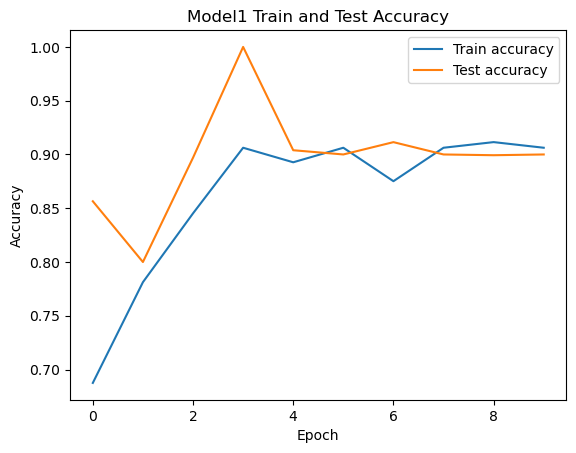

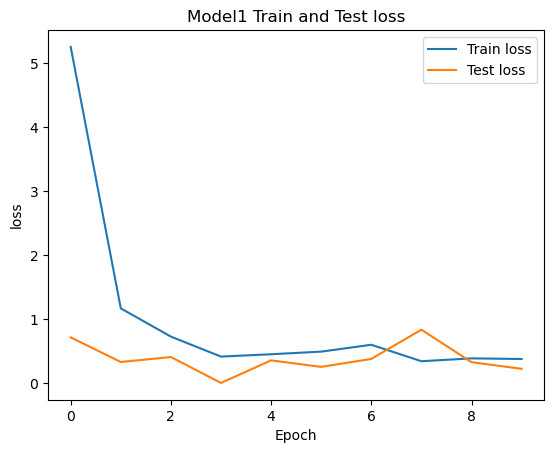

In [66]:
model4_train_acc = historyInceptionResnet.history['accuracy'][-1]
model4_test_acc = historyInceptionResnet.history['val_accuracy'][-1]
model4_train_acc = historyInceptionResnet.history['accuracy'][-1]
model4_test_acc = historyInceptionResnet.history['val_accuracy'][-1]

#plotting test vs train accuracies and losses 
plt.plot(historyInceptionResnet.history['accuracy'], label='Train accuracy')
plt.plot(historyInceptionResnet.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model1 Train and Test Accuracy')
plt.legend()
plt.show()

plt.plot(historyInceptionResnet.history['loss'], label='Train loss')
plt.plot(historyInceptionResnet.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Model1 Train and Test loss')
plt.legend()
plt.show()

In [82]:
model_inceptionresnet = modelInceptionResnet.to_json()
with open('model_inceptionresnet.json','w') as json_file:
    json_file.write(model_inceptionresnet)
model.save_weights('model_inceptionresnet.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


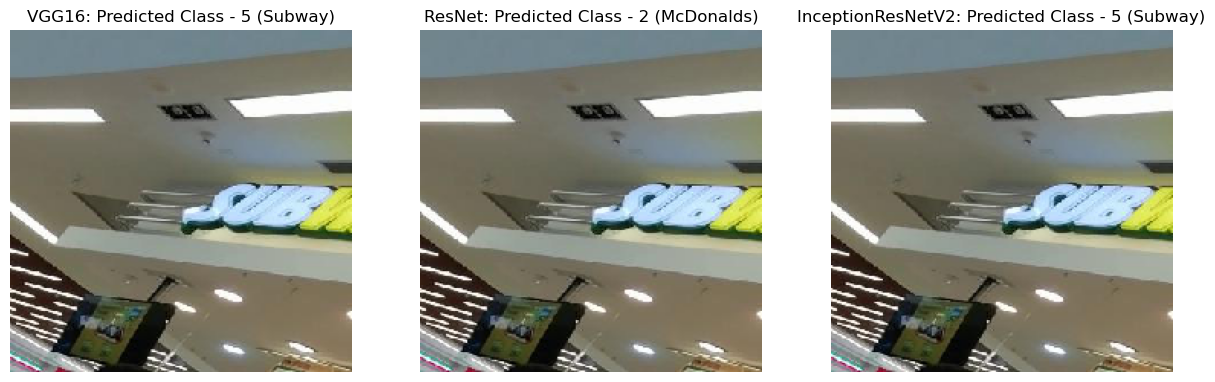

In [91]:
img_path = "C:\\Users\\Admin\\Downloads\\Logos\\logos_v3_mini\\logos3\\train\\Subway\\ankamall_image_664.jpg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values to [0, 1]

# Make predictions for VGG16 model
predictions_vgg16 = model.predict(img_array)
predicted_class_vgg16 = np.argmax(predictions_vgg16)

# Make predictions for ResNet model
predictions_resnet = model_resnet.predict(img_array)
predicted_class_resnet = np.argmax(predictions_resnet)

# Make predictions for InceptionResNetV2 model
predictions_inception_resnet = modelInceptionResnet.predict(img_array)
predicted_class_inception_resnet = np.argmax(predictions_inception_resnet)

#class_labels = list(train_generator.class_indices.keys())

# Show the image and predictions
plt.figure(figsize=(15, 5))

# VGG16 predictions
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title("VGG16: Predicted Class - {} ({})".format(predicted_class_vgg16, class_labels[predicted_class_vgg16]))

# ResNet predictions
plt.subplot(1, 3, 2)
plt.imshow(img)
plt.axis('off')
plt.title("ResNet: Predicted Class - {} ({})".format(predicted_class_resnet, class_labels[predicted_class_resnet]))

# InceptionResNetV2 predictions
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.axis('off')
plt.title("InceptionResNetV2: Predicted Class - {} ({})".format(predicted_class_inception_resnet, class_labels[predicted_class_inception_resnet]))

plt.show()

In [75]:
modelInceptionResnet.evaluate(test_generator)

18/18 ━━━━━━━━━━━━━━━━━━━━ 90s 5s/step - accuracy: 0.5187 - loss: 3.6506


[3.5029568672180176, 0.5196428298950195]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


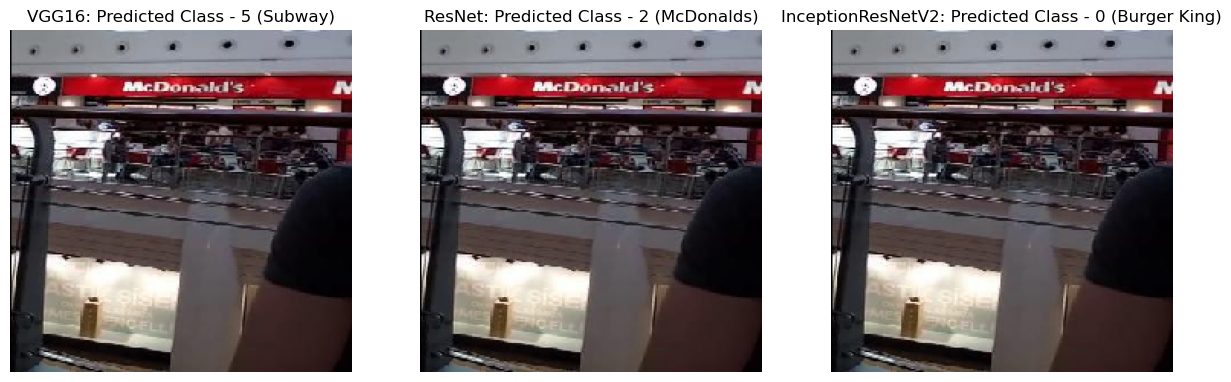

In [100]:
""
img_path = "C:\\Users\\Admin\\Downloads\\Logos\\logos_v3_mini\\logos3\\test\\McDonalds\\armada_image_798.jpg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Rescale pixel values to [0, 1]

# Make predictions for VGG16 model
predictions_vgg16 = model.predict(img_array)
predicted_class_vgg16 = np.argmax(predictions_vgg16)

# Make predictions for ResNet model
predictions_resnet = model_resnet.predict(img_array)
predicted_class_resnet = np.argmax(predictions_resnet)

# Make predictions for InceptionResNetV2 model
predictions_inception_resnet = modelInceptionResnet.predict(img_array)
predicted_class_inception_resnet = np.argmax(predictions_inception_resnet)

class_labels = list(train_generator.class_indices.keys())

# Show the image and predictions
plt.figure(figsize=(15, 5))

# VGG16 predictions
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title("VGG16: Predicted Class - {} ({})".format(predicted_class_vgg16, class_labels[predicted_class_vgg16]))

# ResNet predictions
plt.subplot(1, 3, 2)
plt.imshow(img)
plt.axis('off')
plt.title("ResNet: Predicted Class - {} ({})".format(predicted_class_resnet, class_labels[predicted_class_resnet]))

# InceptionResNetV2 predictions
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.axis('off')
plt.title("InceptionResNetV2: Predicted Class - {} ({})".format(predicted_class_inception_resnet, class_labels[predicted_class_inception_resnet]))

plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 151s 8s/step - accuracy: 0.6906 - loss: 1.0732
18/18 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.5160 - loss: 2.2529
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.5123 - loss: 3.7618


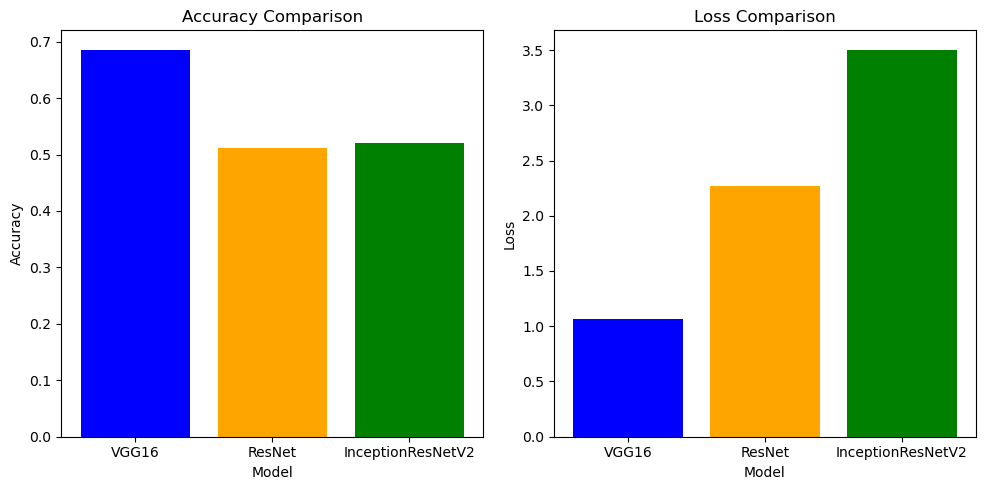

In [102]:
loss_vgg16, accuracy_vgg16 = model.evaluate(test_generator)

# Evaluate ResNet model
loss_resnet, accuracy_resnet = model_resnet.evaluate(test_generator)

# Evaluate InceptionResNetV2 model
loss_inception_resnet, accuracy_inception_resnet = modelInceptionResnet.evaluate(test_generator)

# Store accuracy and loss values
accuracies = [accuracy_vgg16, accuracy_resnet, accuracy_inception_resnet]
losses = [loss_vgg16, loss_resnet, loss_inception_resnet]
model_names = ['VGG16', 'ResNet', 'InceptionResNetV2']

# Plot side by side bar graph
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.bar(model_names, losses, color=['blue', 'orange', 'green'])
plt.title('Loss Comparison')
plt.xlabel('Model')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()